# These are great examples that descripe desired functialities

## Requiments
- Only npyscreen is required
- Official Doc.                 >>    https://npyscreen.readthedocs.io/index.html
- detaild PDF doc. (relase 2)   >>    https://buildmedia.readthedocs.org/media/pdf/npyscreen/latest/npyscreen.pdf
- Google group for Npyscreen    >>    https://groups.google.com/g/npyscreen
- Offical Git                   >>    https://github.com/npcole/npyscreen 

--------------------------------------
- This part to just show the images in the nootbook

In [2]:

from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt


---------------------------------

- ### Ex 1 : Two Boxes with editable text in them

In [ ]:
#!/usr/bin/env python3
import npyscreen
import weakref

class App(npyscreen.NPSAppManaged ):
    def onStart(self):
        self.addForm("MAIN", MainForm, name="TEST_FORM")


class InputWidget(npyscreen.Textfield):
    def __init__(self, *args, **keywords):
        super(InputWidget, self).__init__(*args, **keywords)
        self.value = 'Text_strok'
        dd = 0

class multiContainedBox(npyscreen.BoxTitle):
    _contained_widget = [InputWidget, InputWidget]


    def make_contained_widget(self, contained_widget_arguments=None):
        self._my_widgets = []
        _rely = self.rely+1
        _relx = self.relx+2
        if contained_widget_arguments:
            for widget in self._contained_widget:
                self._my_widgets.append(widget(self.parent,
                                    rely=_rely, relx = _relx,
                                    max_width=20, max_height=3,
                                    **contained_widget_arguments
                                ))
                _rely+=3
        else:
            for widget in self._contained_widget:
                print(widget)
                self._my_widgets.append(widget(self.parent,
                                rely=_rely, relx = _relx,
                                max_width=20, max_height=3
                            ))
                _rely+=3
        self.entry_widget = weakref.proxy(self._my_widgets[0])


    def update(self, clear=True):
        if self.hidden and clear:
            self.clear()
            return False
        elif self.hidden:
            return False
        super(multiContainedBox, self).update(clear=clear)
        for w in self._my_widgets:
            w.update(clear=clear)
            #w.edit()


class MainForm(npyscreen.FormBaseNew):
    def create(self):
        y, x = self.useable_space()

        self.InputBox = self.add(multiContainedBox, name="BOX",max_height=8,max_width=24,relx=20, rely=3)
        self.InputBox2 = self.add(multiContainedBox, name="BOX2", max_height=8, max_width=24, relx=20, rely=12)



MyApp = App()
MyApp.run()

- ### Output 1

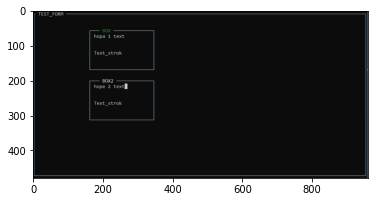

In [3]:
im_array = np.asarray(cv2.imread('ex1.png'))
plt.imshow(im_array)
plt.show()

-----------------------------------------------------

- ### Ex 2 : Read Time Colock >>>> edit a TitleText.

In [ ]:
#!/usr/bin/env python
import npyscreen
import time
import curses

class TimeoutApplication(npyscreen.NPSAppManaged):
	def onStart(self):
		self.mainForm = self.addForm('MAIN', TimeoutForm)
		
		
class TimeoutForm(npyscreen.Form):
	def create(self):
		self.keypress_timeout = 10
		self.timeWidget       = self.add(npyscreen.TitleText, name="Time:", value=None, editable = None)
	
	def afterEditing(self):
		self.parentApp.NEXT_ACTIVE_FORM = None
	
	def while_waiting(self):
		self.timeWidget.value = time.asctime()
		self.timeWidget.display()


if __name__ == "__main__":
	app = TimeoutApplication()
	app.run()

- ### Output 2

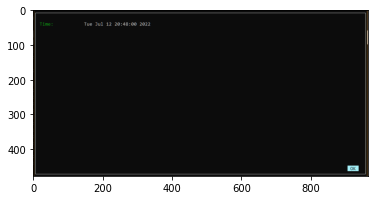

In [4]:
im_array = np.asarray(cv2.imread('ex2_time.PNG'))
plt.imshow(im_array)
plt.show()

---------------------------------------------

- ### Ex 3 : Check TitleInput value change and act on it.

In [ ]:
#!/usr/bin/env python

import npyscreen
from IPy import IP


def is_valid_ip(addr):
    try:
        IP(addr)
        return True
    except:
        return False


class IPInputWidget(npyscreen.Textfield):
    def when_value_edited(self):
    # doesn't seem to be called
        if not is_valid_ip(self.value):
            self.color = "WARNING"
        else:
            self.color = "DEFAULT"

        self.update()

class TitleInput(npyscreen.TitleText):
    _entry_type = IPInputWidget

class SetupForm(npyscreen.ActionForm):
    def afterEditing(self):
        self.parentApp.setNextForm(None)

    def create(self):
        self.ip = self.add(TitleInput, name='IP Address', value="127.0.0.1")

    def on_ok(self):
        errors = []
        if not is_valid_ip(self.ip.value):
            errors.append("Invalid IP Address: %s" % (self.ip.value,))

        if len(errors) > 0:
            errors = [" - " + e for e in errors]
            str_errors = "\n".join(errors)
            npyscreen.notify_confirm("Please fix the following: \n%s"
            % (str_errors,))
            self.editing = True
            return

# do something that takes a little while
        npyscreen.notify("busy... please wait...") 

# do something that takes time

# remove notification

        npyscreen.notify_wait("Saved changes.")


    def on_cancel(self):
        npyscreen.notify_wait("No changes were saved.")


class MyApplication(npyscreen.NPSAppManaged):
    def onStart(self):
        npyscreen.setTheme(npyscreen.Themes.DefaultTheme)
        self.addForm('MAIN', SetupForm, name="Hello")


if __name__ == '__main__':
    TestApp = MyApplication()

try:
    TestApp.run()
except KeyboardInterrupt:
    pass

- ### Output 3

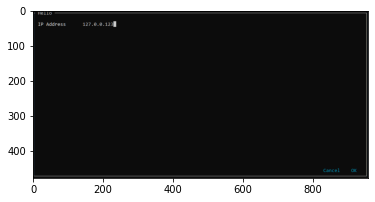

In [6]:
im_array = np.asarray(cv2.imread('ex3_ipcheck.png'))
plt.imshow(im_array)
plt.show()

---------------------------------------------

- ### Ex 4 : Jump to certain point when hit enter on another point

In [ ]:
import curses
import npyscreen
import random

class MyGrid(npyscreen.GridColTitles):
    # You need to override custom_print_cell to manipulate how
    # a cell is printed. In this example we change the color of the
    # text depending on the string value of cell.
    def custom_print_cell(self, actual_cell, cell_display_value):
        if cell_display_value =='FAIL':
           actual_cell.color = 'DANGER'
        elif cell_display_value == 'PASS':
           actual_cell.color = 'GOOD'
        else:
           actual_cell.color = 'DEFAULT'




class nuevoIngreso(npyscreen.FormBaseNew):
    def afterEditing(self):

        self.parentApp.setNextForm(None)


    def create(self):
        self.myDepartment = self.add(npyscreen.TitleSelectOne, scroll_exit=True, max_height=3, name='Departmento', values = ['M', 'C', 'L'])
        self.myCodigo = self.add(npyscreen.TitleText, name='CODIGO: ')
        self.myDescripcion = self.add(npyscreen.TitleText, name='DESCRIPCION: ')
        self.myKit = self.add(npyscreen.TitleText, name='UN/KIT: ')
        self.myPrecio = self.add(npyscreen.TitleText, name='$/UN')
        self.myGrid = self.add(MyGrid,select_whole_line = True,editable = False)
        self.myPrecio.entry_widget.handlers.update({curses.ascii.CR: self.input_send})

        # Adding values to the Grid, this code just randomly
        # fills a 2 x 4 grid with random PASS/FAIL strings.
        self.myGrid.values = []
        for x in range(3):
            row = []
            for y in range(4):
                if bool(random.getrandbits(1)):
                    row.append("PASS")
                else:
                    row.append("FAIL")
            self.myGrid.values.append(row)

    def input_send(self, _input):

        #self.myCodigo.editing = False
        #self.myDescripcion.editing = False
        #self.myKit.editing = False
        #self.myGrid.editing = False
        #self.myPrecio.editing =
        self.display()
        self.editw=1
        self.myPrecio.editing = False
        self.editing = False
        self.edit()


class MyApplication(npyscreen.NPSAppManaged):
    def onStart(self):
        F=self.addForm('MAIN', nuevoIngreso, name='Nuevo Ingreso')
        # A real application might define more forms here.......



if __name__ == '__main__':
    TestApp = MyApplication().run()


- ### Output 4

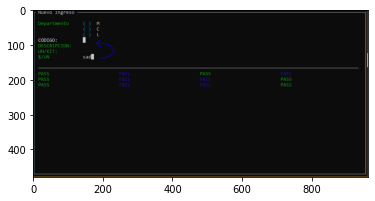

In [7]:
im_array = np.asarray(cv2.imread('ex4_jump.PNG'))
plt.imshow(im_array)
plt.show()

--------------------------------------------

--------------------------------

- ### Ex 5 : Some unsorted Examples 

### Search Like VIM

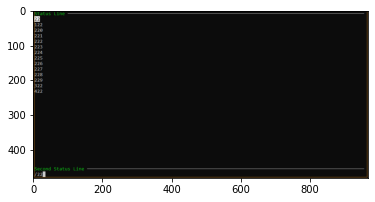

In [8]:
im_array = np.asarray(cv2.imread('search.PNG'))
plt.imshow(im_array)
plt.show()

### MultilineEditable

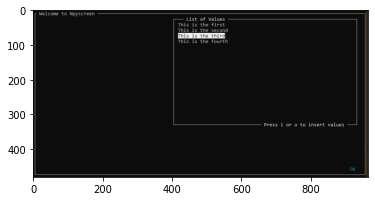

In [9]:
im_array = np.asarray(cv2.imread('MultilineEditable.PNG'))
plt.imshow(im_array)
plt.show()